In [1]:
!git clone https://github.com/NidhiAI/Biometric-Customer-Authentication

Cloning into 'Biometric-Customer-Authentication'...
remote: Enumerating objects: 1232, done.
remote: Counting objects: 100% (300/300), done.
remote: Compressing objects: 100% (206/206), done.
remote: Total 1232 (delta 101), reused 292 (delta 94), pack-reused 932
Receiving objects: 100% (1232/1232), 94.13 MiB | 23.80 MiB/s, done.
Resolving deltas: 100% (415/415), done.
Updating files: 100% (554/554), done.


In [37]:
cd '/content/Biometric-Customer-Authentication'

/content/Biometric-Customer-Authentication


In [3]:
!python genderExtractFeatures.py

In [4]:
##Modeling - AIML
#from genetic_selection import GeneticSelectionCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import GaussianNB 

#Evaluation
from sklearn import metrics

# confusion matrix
import sklearn.metrics

import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
#import csv
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import LabelEncoder, StandardScaler
#import tensorflow as tf
#from tensorflow import keras

#from keras import layers

In [38]:
import pandas as pd
print('start reading csv file ..')
data1 = pd.read_csv('/content/Biometric-Customer-Authentication/genderDetection/maleFemaleAudioFeatures.csv')
data1.head() # Display 5 wav files features 

start reading csv file ..


,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,VoxCeleb_male-4.wav,0.447847,0.101857,2348.586955,2167.682732,4930.583390,0.107337,-178.375534,109.539551,-23.147758,...,-5.032254,16.913191,-11.962511,19.154919,-10.601557,9.661175,-2.964882,7.666598,-3.345588,male
1,bdl_0056-11.wav,0.374571,0.081878,2251.493468,1601.616749,3972.621647,0.149026,-266.629761,99.810028,-30.411924,...,-17.195251,11.129428,-11.117137,5.627274,-8.926105,-3.672829,-3.633209,-3.635530,-6.234490,male
2,Shahid_Kapoor-1.wav,0.359306,0.090889,1209.802751,1293.350437,2386.180579,0.063274,-242.215088,155.314575,-12.603355,...,-7.070581,-3.717260,-1.519660,1.348663,-6.526679,1.948955,-2.494955,-3.665357,0.549846,male
3,rxr_0066-11.wav,0.443019,0.054201,2009.971108,1705.177346,3827.254283,0.111427,-353.528198,82.163979,-10.784312,...,-9.527588,7.092362,-13.853847,10.231321,-0.791882,0.385840,-1.640693,0.889997,-1.967648,male
4,Amitabh_Bachchan-1.wav,0.400907,0.014618,815.422445,1093.299399,1390.453423,0.036333,-458.473480,165.520737,31.746883,...,0.892941,6.364282,-0.537627,5.447022,1.836523,-0.654764,2.239891,1.436717,-0.029083,male


In [39]:

data1.label.unique()


array(['male', 'female'], dtype=object)

In [40]:
data1.label.value_counts()

male      32
female    32
Name: label, dtype: int64

In [41]:
# Dropping unneccesary columns 'filename'
data = data1.drop(['filename'],axis=1)#Encoding the Labels

<Axes: xlabel='label', ylabel='count'>

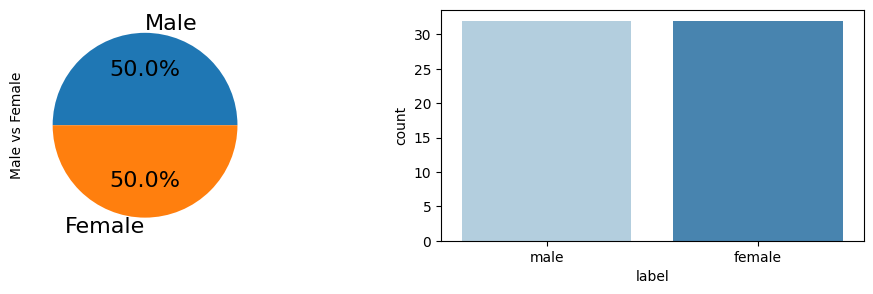

In [42]:
import seaborn as sns
plt.figure(figsize=(12, 3))

# left side graph
plt.subplot(1, 2, 1)
data.label.value_counts().plot(kind="pie",
                                           fontsize=16,
                                           labels=["Male", "Female"],
                                           ylabel="Male vs Female",
                                           autopct='%1.1f%%');
#plt.show()

# right side graph
plt.subplot(1, 2, 2)
#sns.countplot(x="label",data=data, palette="pastel")
sns.countplot(x="label",data=data, palette="Blues")

<ipython-input-43-b51d3b90ac7e>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cmap='Blues',annot=False)


<Axes: >

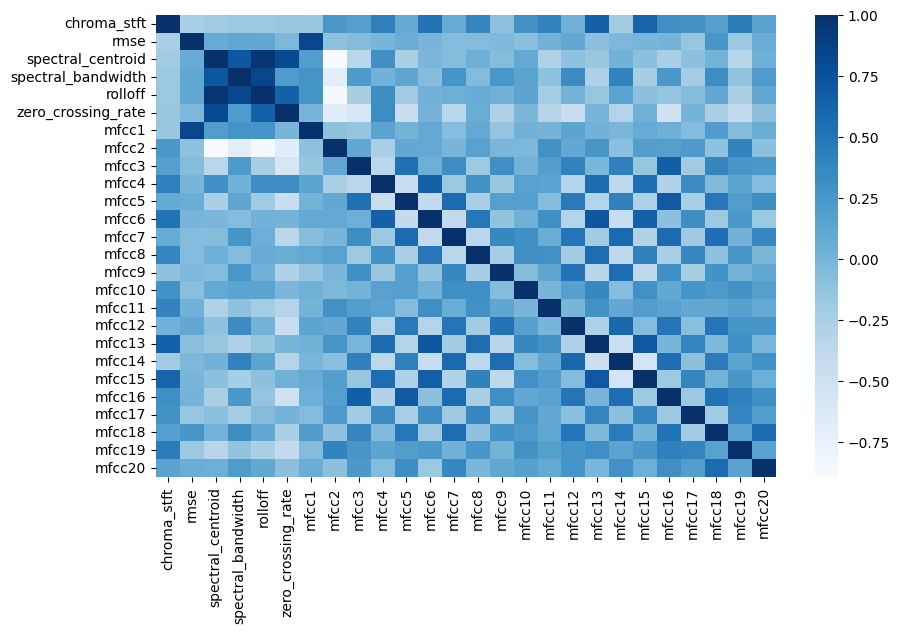

In [43]:
# check corerelation

plt.figure(figsize=(10,6))
#sns.heatmap(data.corr(),cmap='Greens',annot=False)
sns.heatmap(data.corr(),cmap='Blues',annot=False)

In [44]:
# now we will convert these 2 values in 0/1 
# male to 0, female to 1
data.label.replace(['male', 'female'],[0,1], inplace=True)

In [45]:
# Divive data into x(Independent variables) and y (Target/Dependent variable) 
x = data.drop("label", axis= 1)
y = data["label"]

In [46]:
# Print x 
print(x.shape)
x.head(2)

(64, 26)


,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.447847,0.101857,2348.586955,2167.682732,4930.583390,0.107337,-178.375534,109.539551,-23.147758,75.501152,...,-3.890760,-5.032254,16.913191,-11.962511,19.154919,-10.601557,9.661175,-2.964882,7.666598,-3.345588
1,0.374571,0.081878,2251.493468,1601.616749,3972.621647,0.149026,-266.629761,99.810028,-30.411924,72.770004,...,-4.788062,-17.195251,11.129428,-11.117137,5.627274,-8.926105,-3.672829,-3.633209,-3.635530,-6.234490


In [47]:
# Print y 
print(y.shape)
y.head(2)

(64,)


0    0
1    0
Name: label, dtype: int64

In [48]:
#Separate out objects and numeric columns in x  
cat_cols = x.columns[x.dtypes == 'object']
num_cols = x.columns[(x.dtypes == 'float64') | (x.dtypes == 'int64')]
# num_cols1=list(x.select_dtypes(exclude='object').columns) # can do this way also 

In [49]:
cat_cols

Index([], dtype='object')

In [50]:
num_cols

Index(['chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth',
       'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4',
       'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11',
       'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18',
       'mfcc19', 'mfcc20'],
      dtype='object')

In [51]:
#applying scalar to all numeric columns 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#x[num_cols]=scaler.fit_transform(x[num_cols]) # no categorical columns, so can go with below 
x=scaler.fit_transform(x)

In [52]:
#Sample for training and testing the model
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((44, 26), (20, 26), (44,), (20,))

In [53]:
lr = LogisticRegression(random_state=0).fit(X_train, Y_train)
rf = RandomForestClassifier(n_estimators = 7).fit(X_train, Y_train)
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, Y_train)
svc = SVC().fit(X_train, Y_train)
#nb = ComplementNB().fit(X_train, Y_train) # can not run this with negative values in data
nb = GaussianNB().fit(X_train, Y_train)

In [54]:
# Prediction on Train data set 
lr_pred = lr.predict(X_train)
rf_pred = rf.predict(X_train)
knn_pred = knn.predict(X_train)
svc_pred = svc.predict(X_train)
nb_pred = nb.predict(X_train)

In [55]:
lr_train_score_1 = 100*metrics.accuracy_score(Y_train, lr_pred)
rf_train_score_1 = 100*metrics.accuracy_score(Y_train, rf_pred)
knn_train_score_1 = 100*metrics.accuracy_score(Y_train, knn_pred)
svc_train_score_1 = 100*metrics.accuracy_score(Y_train, svc_pred)
nb_train_score_1 = 100*metrics.accuracy_score(Y_train, nb_pred)

In [56]:
print("Train Accuracy score of LR = ",lr_train_score_1)
print("Train Accuracy score of RF = ",rf_train_score_1)
print("Train Accuracy score of KNN = ",knn_train_score_1)
print("Train Accuracy score of SVC = ",svc_train_score_1)
print("Train Accuracy score of NB = ",nb_train_score_1)

Train Accuracy score of LR =  100.0
Train Accuracy score of RF =  97.72727272727273
Train Accuracy score of KNN =  88.63636363636364
Train Accuracy score of SVC =  97.72727272727273
Train Accuracy score of NB =  90.9090909090909


In [57]:
# Prediction on Test data set 
lr_pred_test = lr.predict(X_test)
rf_pred_test = rf.predict(X_test)
knn_pred_test = knn.predict(X_test)
svc_pred_test = svc.predict(X_test)
nb_pred_test = nb.predict(X_test)

In [58]:
lr_test_score_1 = 100*metrics.accuracy_score(Y_test, lr_pred_test)
rf_test_score_1 = 100*metrics.accuracy_score(Y_test, rf_pred_test)
knn_test_score_1 = 100*metrics.accuracy_score(Y_test, knn_pred_test)
svc_test_score_1 = 100*metrics.accuracy_score(Y_test, svc_pred_test)
nb_test_score_1 = 100*metrics.accuracy_score(Y_test, nb_pred_test)

In [59]:
print("Test Accuracy score of LR = ",lr_test_score_1)
print("Test Accuracy score of RF = ",rf_test_score_1)
print("Test Accuracy score of KNN = ",knn_test_score_1)
print("Test Accuracy score of SVC = ",svc_test_score_1)
print("Test Accuracy score of NB = ",nb_test_score_1)

Test Accuracy score of LR =  95.0
Test Accuracy score of RF =  95.0
Test Accuracy score of KNN =  85.0
Test Accuracy score of SVC =  95.0
Test Accuracy score of NB =  95.0


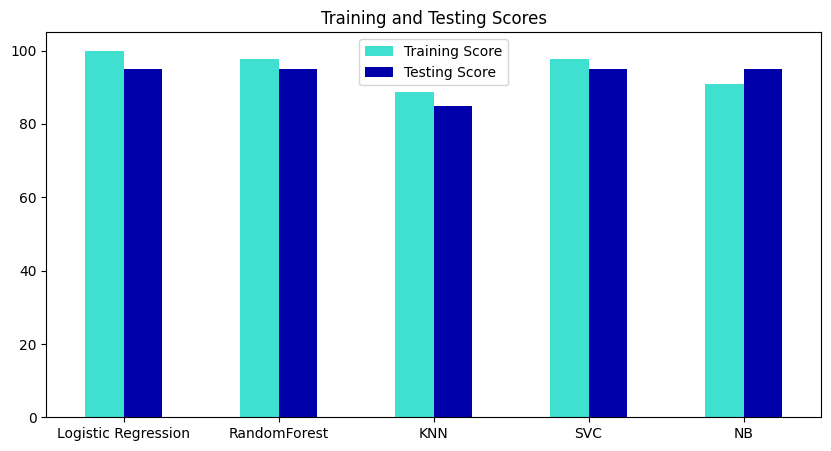

In [60]:
# Plot graph to compare models for Training and Testing Scores
trainScores = [lr_train_score_1, rf_train_score_1, knn_train_score_1, svc_train_score_1, nb_train_score_1]

testScores = [lr_test_score_1, rf_test_score_1, knn_test_score_1, svc_test_score_1, nb_test_score_1]

indices = ['Logistic Regression', 'RandomForest', 'KNN', 'SVC' , 'NB']

scores = pd.DataFrame({'Training Score': trainScores,'Testing Score': testScores}, index=indices)

#plot = scores.plot.bar(figsize=(10, 5), rot=0, color=['#df6589ff', '#3c1053ff'])
plot = scores.plot.bar(figsize=(10, 5), rot=0, color=['#40E0D0', '#0000aa'])

plt.title('Training and Testing Scores')
plt.show()

In [61]:
# print scores dataframe created above 
scores.sort_values(by='Testing Score', ascending=False, inplace = True)
scores

,Training Score,Testing Score
Logistic Regression,100.000000,95.0
RandomForest,97.727273,95.0
SVC,97.727273,95.0
NB,90.909091,95.0
KNN,88.636364,85.0


In [62]:
predVals = pd.DataFrame(data={'truth': Y_test, 
                              'Logisticregression': lr_pred_test, 
                              'RandomForest': rf_pred_test, 
                              'KNN': knn_pred_test, 
                              'SVC': svc_pred_test, 
                              'NaiveBayes': nb_pred_test})

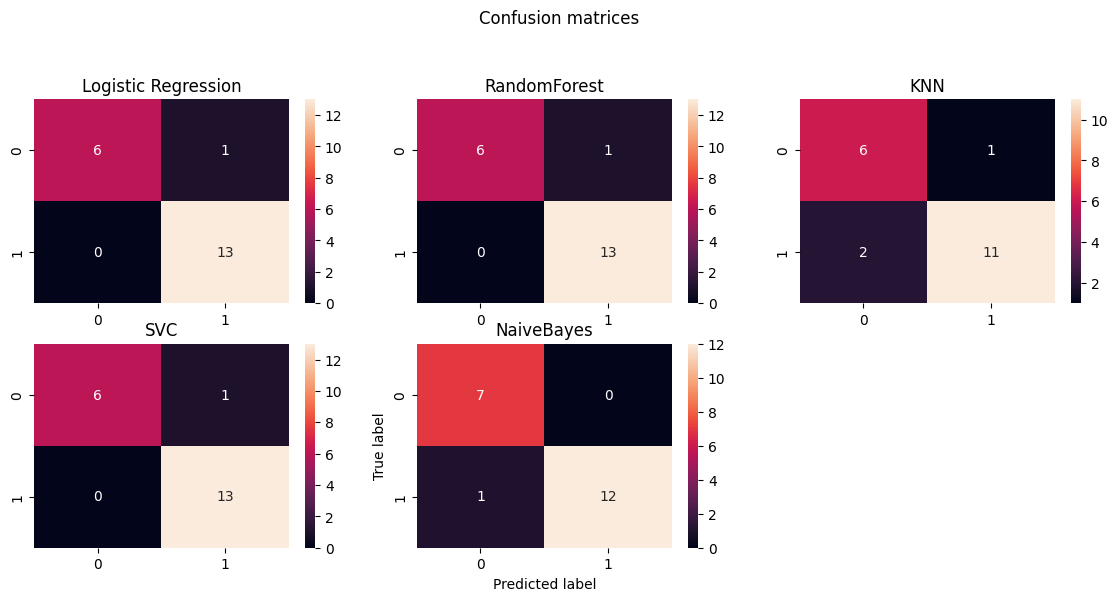

In [63]:
plt.figure(figsize=(14, 9))
##plt.ylabel('True label')
##plt.xlabel('Predicted label')

plt.subplot(3, 3, 1)
sns.heatmap(sklearn.metrics.confusion_matrix(Y_test, lr_pred_test), annot=True).set(title='Logistic Regression')

plt.subplot(3, 3, 2)
sns.heatmap(sklearn.metrics.confusion_matrix(Y_test, rf_pred_test), annot=True).set(title='RandomForest')

plt.subplot(3, 3, 3)
sns.heatmap(sklearn.metrics.confusion_matrix(Y_test, knn_pred_test), annot=True).set(title='KNN')

plt.subplot(3, 3, 4)
sns.heatmap(sklearn.metrics.confusion_matrix(Y_test, svc_pred_test), annot=True).set(title='SVC')

plt.subplot(3, 3, 5)
sns.heatmap(sklearn.metrics.confusion_matrix(Y_test, nb_pred_test), annot=True).set(title='NaiveBayes')

plt.suptitle('Confusion matrices')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [64]:
print("<< Logistic Regression >> \n\n", sklearn.metrics.classification_report(Y_test, lr_pred_test))

<< Logistic Regression >> 

               precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.93      1.00      0.96        13

    accuracy                           0.95        20
   macro avg       0.96      0.93      0.94        20
weighted avg       0.95      0.95      0.95        20



In [65]:
print("<< Random Forest >>\n\n", sklearn.metrics.classification_report(Y_test, rf_pred_test))

<< Random Forest >>

               precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.93      1.00      0.96        13

    accuracy                           0.95        20
   macro avg       0.96      0.93      0.94        20
weighted avg       0.95      0.95      0.95        20



In [66]:
print("<< K Nearest Neighbour >>\n\n", sklearn.metrics.classification_report(Y_test, knn_pred_test))

<< K Nearest Neighbour >>

               precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.92      0.85      0.88        13

    accuracy                           0.85        20
   macro avg       0.83      0.85      0.84        20
weighted avg       0.86      0.85      0.85        20



In [67]:
print("<< Supprt Vector >>\n\n", sklearn.metrics.classification_report(Y_test, svc_pred_test))

<< Supprt Vector >>

               precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.93      1.00      0.96        13

    accuracy                           0.95        20
   macro avg       0.96      0.93      0.94        20
weighted avg       0.95      0.95      0.95        20



In [68]:
print("<< Naive Bayes >>\n\n", sklearn.metrics.classification_report(Y_test, nb_pred_test))

<< Naive Bayes >>

               precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.92      0.96        13

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



In [69]:
predVals.sample(5)

,truth,Logisticregression,RandomForest,KNN,SVC,NaiveBayes
35,1,1,1,1,1,1
21,0,0,0,0,0,0
3,0,0,0,0,0,0
62,1,1,1,1,1,1
54,1,1,1,1,1,1


# predict on New User

In [204]:
#newUser = data1.loc[data1['filename'] == 'Nidhi_Agarwal_0010-11.wav']   # Dropping unneccesary columns 'filename'
newUser = data1.loc[data1['filename'] == 'Ajay_Devgan-1.wav'] 
#newUser = data1.loc[data1['filename'].isin(['Nidhi_Agarwal_0010-11.wav','Pooja_Stories_0009-11.wav'])]

#newUser = data1.loc[data1['filename'].isin(['Nidhi_Agarwal_0010-11.wav','Ajay_Devgan-1.wav','Pooja_Stories_0009-11.wav'])]


In [205]:
newUser

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
26,Ajay_Devgan-1.wav,0.454327,0.058352,967.308983,1188.780388,1769.374486,0.048485,-281.642059,176.901978,4.768245,...,0.930168,5.092219,-7.643029,6.893967,0.91358,0.428194,-6.172984,-0.538485,-0.793509,male


In [206]:
# Dropping unneccesary columns 'filename'
newUser = newUser.drop(['filename'],axis=1)#Encoding the Labels

In [207]:
# male to 0, female to 1
newUser.label.replace(['male', 'female'],[0,1], inplace=True)

In [208]:
newUser

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
26,0.454327,0.058352,967.308983,1188.780388,1769.374486,0.048485,-281.642059,176.901978,4.768245,15.838964,...,0.930168,5.092219,-7.643029,6.893967,0.91358,0.428194,-6.172984,-0.538485,-0.793509,0


In [209]:
# Divive data into x(Independent variables) and y (Target/Dependent variable) 
x_newUser = newUser.drop("label", axis= 1)
y_newUser = newUser["label"]

In [210]:
#Separate out objects and numeric columns in x  
cat_cols_x_newUser = x_newUser.columns[x_newUser.dtypes == 'object']
num_cols_x_newUser = x_newUser.columns[(x_newUser.dtypes == 'float64') | (x_newUser.dtypes == 'int64')]
# num_cols1=list(x.select_dtypes(exclude='object').columns) # can do this way also 

In [211]:
#applying scalar to all numeric columns 
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#x_newUser[num_cols]=scaler.fit_transform(x_newUser[num_cols]) # no categorical columns, so can go with below 
x_newUser=scaler.fit_transform(x_newUser)

In [212]:
# Prediction on Test data set 
lr_pred_test_x_newUser = lr.predict(x_newUser)
rf_pred_test_x_newUser = rf.predict(x_newUser)
knn_pred_test_x_newUser = knn.predict(x_newUser)
svc_pred_test_x_newUser = svc.predict(x_newUser)
nb_pred_test_x_newUser = nb.predict(x_newUser)

In [213]:
lr_pred_test_x_newUser

array([0])

In [214]:
y_newUser

26    0
Name: label, dtype: int64

In [215]:
lr_test_score_1_newUser = 100*metrics.accuracy_score(y_newUser, lr_pred_test_x_newUser)
rf_test_score_1_newUser = 100*metrics.accuracy_score(y_newUser, rf_pred_test_x_newUser)
knn_test_score_1_newUser = 100*metrics.accuracy_score(y_newUser, knn_pred_test_x_newUser)
svc_test_score_1_newUser = 100*metrics.accuracy_score(y_newUser, svc_pred_test_x_newUser)
nb_test_score_1_newUser = 100*metrics.accuracy_score(y_newUser, nb_pred_test_x_newUser)

In [216]:
print("Test Accuracy score of LR = ",lr_test_score_1_newUser)
print("Test Accuracy score of RF = ",rf_test_score_1_newUser)
print("Test Accuracy score of KNN = ",knn_test_score_1_newUser)
print("Test Accuracy score of SVC = ",svc_test_score_1_newUser)
print("Test Accuracy score of NB = ",nb_test_score_1_newUser)

Test Accuracy score of LR =  100.0
Test Accuracy score of RF =  100.0
Test Accuracy score of KNN =  100.0
Test Accuracy score of SVC =  100.0
Test Accuracy score of NB =  100.0


In [217]:
predVals_newUser = pd.DataFrame(data={'truth': y_newUser, 
                              'Logisticregression': lr_pred_test_x_newUser, 
                              'RandomForest': rf_pred_test_x_newUser, 
                              'KNN': knn_pred_test_x_newUser, 
                              'SVC': svc_pred_test_x_newUser, 
                              'NaiveBayes': nb_pred_test_x_newUser})

In [219]:
predVals_newUser

,truth,Logisticregression,RandomForest,KNN,SVC,NaiveBayes
26,0,0,0,0,0,0
